<a href="https://colab.research.google.com/github/ADVAIT135/CDAC/blob/main/6.%20Deep%20Learning/ASSIGNMENT%204/CDAC_PGDAI_DEEP_LEARNING_ASSIGNMENT__4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u> Name: </u> ADVAIT GURUNATH CHAVAN
# <u> Email ID: </u> advaitchavan135@gmail.com
# CDAC PGDAI DEEP LEARNING ASSIGNMENT__4

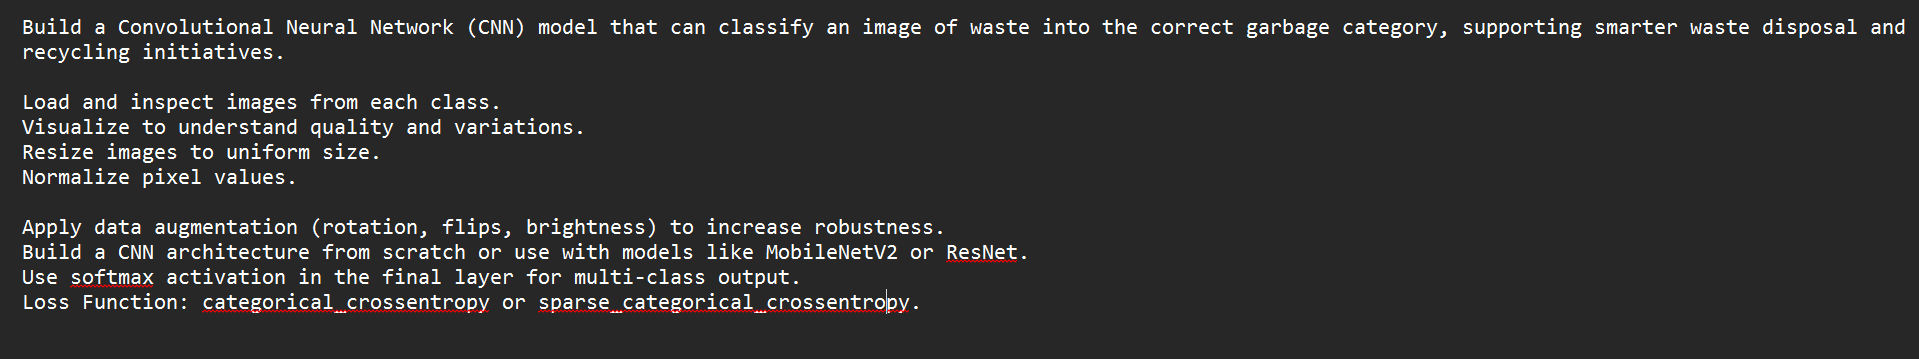

In [59]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## 1. Split Dataset into Train/Test

In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asdasdasasdas/garbage-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/garbage-classification


In [30]:
base_dir = '/kaggle/input/garbage-classification/Garbage classification/Garbage classification'

In [24]:
split_ratio = 0.8

In [60]:
selected_categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [61]:
processed_data_dir = '/content/processed_data'
if os.path.exists(processed_data_dir):
    # Remove any existing processed_data directory from previous runs.
    shutil.rmtree(processed_data_dir)
os.makedirs(processed_data_dir, exist_ok=True)

In [62]:
train_dir = os.path.join(processed_data_dir, 'train')
test_dir  = os.path.join(processed_data_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [63]:
split_ratio = 0.8

In [64]:
for category in selected_categories:
    category_path = os.path.join(base_dir, category)
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # List all image files in the category folder.
    files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]
    random.shuffle(files)

    # Split files based on the ratio.
    split_index = int(len(files) * split_ratio)
    train_files = files[:split_index]
    test_files = files[split_index:]

    # Copy files to the train directory.
    for file in train_files:
        src = os.path.join(category_path, file)
        dst = os.path.join(train_category_dir, file)
        shutil.copy(src, dst)

    # Copy files to the test directory.
    for file in test_files:
        src = os.path.join(category_path, file)
        dst = os.path.join(test_category_dir, file)
        shutil.copy(src, dst)

print("Dataset splitting completed successfully.")
print("Processed data directory:", processed_data_dir)

Dataset splitting completed successfully.
Processed data directory: /content/processed_data


##  2. Load Data and Apply Augmentation

In [65]:
target_size = (150, 150)
batch_size = 32

In [66]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [67]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [68]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=selected_categories,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2019 images belonging to 6 classes.


In [69]:

test_generator = test_datagen.flow_from_directory(
    test_dir,
    classes=selected_categories,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 508 images belonging to 6 classes.


## 3. Build the CNN Model   

In [70]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(selected_categories), activation='softmax')  # Six units for six classes
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [71]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Visualize a few sample images

In [47]:
import matplotlib.pyplot as plt

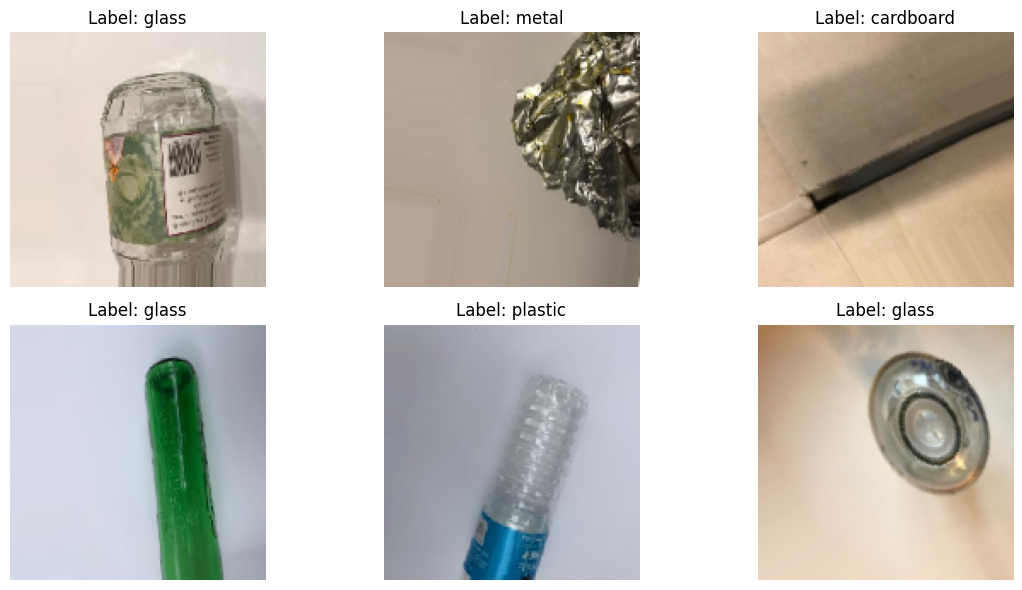

In [72]:
images, labels = next(train_generator)

# Plot a few training images
plt.figure(figsize=(12, 6))
for i in range(min(6, len(images))):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(f'Label: {list(train_generator.class_indices.keys())[list(labels[i]).index(1)]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Train the Model       

In [85]:
epochs = 40
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.5737 - loss: 1.1706 - val_accuracy: 0.6562 - val_loss: 0.9334
Epoch 2/40
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4688 - loss: 1.2946

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4688 - loss: 1.2946 - val_accuracy: 0.6583 - val_loss: 0.9328
Epoch 3/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.6100 - loss: 1.0730 - val_accuracy: 0.6479 - val_loss: 1.0057
Epoch 4/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5625 - loss: 1.2298 - val_accuracy: 0.6375 - val_loss: 0.9826
Epoch 5/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.6038 - loss: 1.0536 - val_accuracy: 0.6313 - val_loss: 0.9578
Epoch 6/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6875 - loss: 0.8396 - val_accuracy: 0.6021 - val_loss: 1.0330
Epoch 7/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.6145 - loss: 1.0176 - val_accuracy: 0.6521 - val_loss: 0.9205
Epoch 8/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7500 - loss: 0.9679 - val_accuracy: 0.6604 - val_loss: 0.8860
Epoch 9/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.6127 - loss: 0.9947 - val_accuracy: 0.6708 - val_

## 6. Evaluate the Model       

In [86]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7091 - loss: 0.8374
Test Accuracy: 73.43%


## 7. Visualize Training History

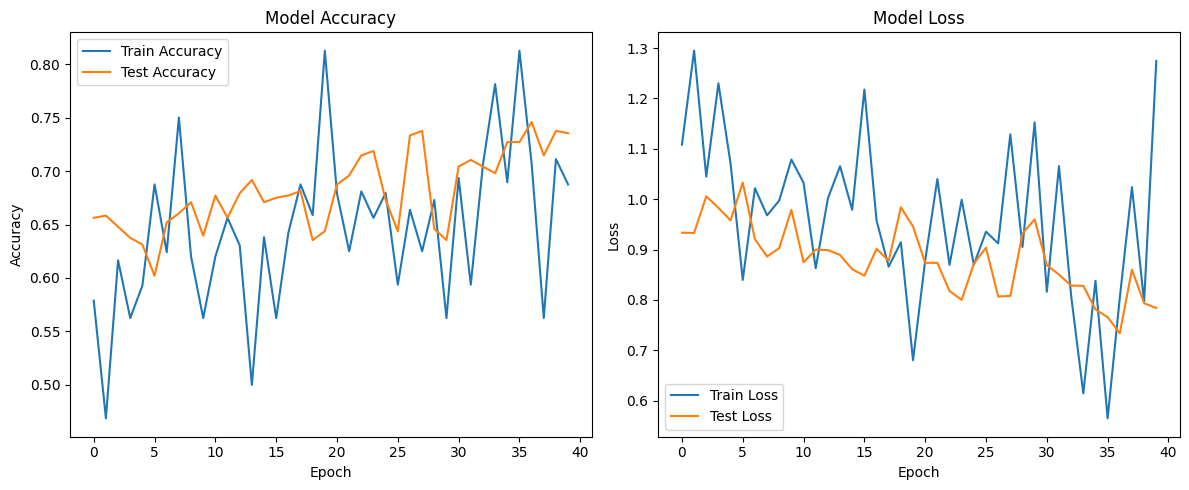

In [87]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 8. Generate and Visualize Test Results

In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


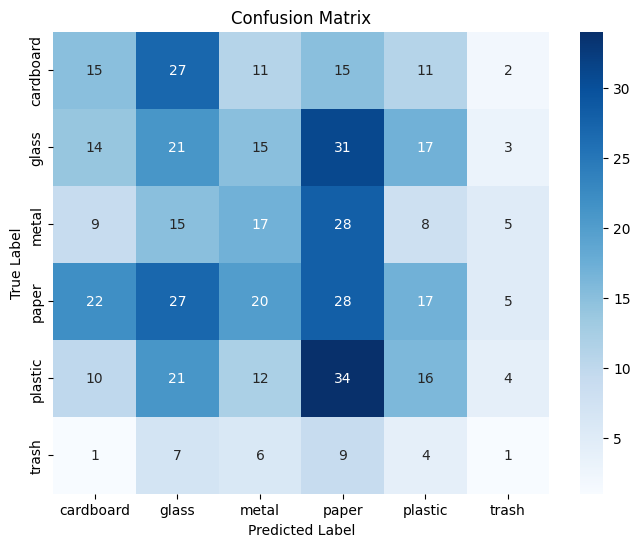

In [89]:
test_generator.reset()

# Convert the steps to integer to avoid the error.
steps = int(np.ceil(test_generator.samples / batch_size))
preds = model.predict(test_generator, steps=steps)
predicted_class_indices = np.argmax(preds, axis=1)

# Get true labels from the generator.
true_class_indices = test_generator.classes

# Compute confusion matrix.
cm = confusion_matrix(true_class_indices, predicted_class_indices, labels=range(len(class_labels)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


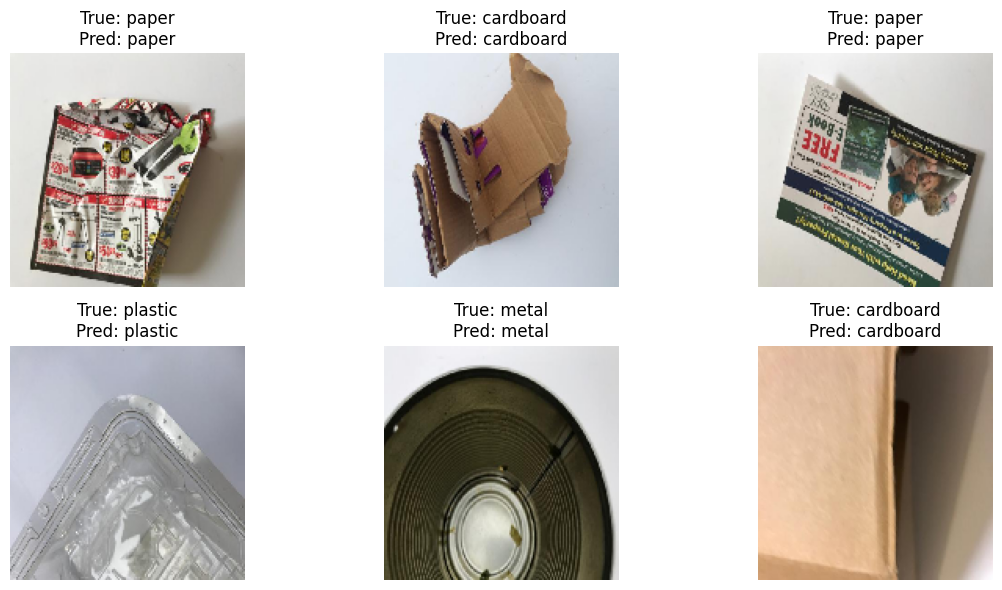

In [90]:
test_images, test_labels = next(test_generator)  # Get one batch from the test generator
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
class_labels = list(test_generator.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(min(6, len(test_images))):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## 9.  Save the Trained Model     

In [91]:
model.save('/content/garbage_classification_model.h5')
print("Model saved as /content/garbage_classification_model.h5")

Model saved as /content/garbage_classification_model.h5
